In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from classification_gridsearch import *

## DataSet preparation for Modelling

In [4]:
train_df_raw = pd.read_csv('../steps/train_df_sex.csv')
train_df_raw.drop(list(train_df_raw)[0], axis = 1, inplace = True)
train_labels = train_df_raw.Sex
train_df_raw.head()

,Sex,Carnitine,Betaine,Choline,Dimethyl-glycine,Sarcosine,Trimethyl-amine-N-oxide,Carnitine.1,Octadecenoyl-carnitine,Acetyl-carnitine,...,linolenic acid,eicosadienoic acid,dihomo-γ-linolenic acid,behenic acid,arachidonic acid,eicosapentaenoic acid,lignoceric acid,docosatetraenoic acid,docosapentaenoic acid,docosahexaenoic acid
0,1,35.75,23.18,7.17,1.72,1.72,4.01,35.099538,0.085199,6.320796,...,10.879799,5.319904,35.859981,2.723465,112.576293,8.328175,1.999100,4.942948,11.566792,26.280465
1,2,24.21,17.44,7.07,1.27,2.00,1.36,28.290096,0.081677,4.202956,...,24.931578,3.221425,29.688596,0.480000,127.092685,22.635476,0.480000,5.238982,15.598824,29.184711
2,2,32.58,30.33,10.36,3.34,2.16,16.01,32.145062,0.081428,7.283125,...,29.501595,6.265210,47.109698,1.217093,126.275559,22.852511,1.003915,4.431896,16.378119,31.900782
3,2,45.87,25.11,8.44,2.66,1.89,4.41,40.906757,0.079903,5.282478,...,18.114552,4.321560,60.686240,1.371840,143.847974,14.002627,1.231737,1.920000,11.177809,44.153261
4,1,45.27,35.49,9.50,2.35,3.83,6.02,46.236807,0.120258,9.351817,...,16.607365,5.518288,38.490243,1.864494,228.148104,22.030076,1.786610,10.724531,21.575420,43.181644


### Scaling of variables

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
train_df_raw.drop('Sex', axis = 1, inplace = True)

train_df_stand = StandardScaler().fit_transform(train_df_raw)

train_df_minmax = MinMaxScaler().fit_transform(train_df_raw)

# Modelling

### SVM

In [5]:
# Minmax Scaling
svm(train_df_minmax, train_labels)

([({'C': 100000, 'degree': 2, 'kernel': 'poly'}, 0.953154761904762),
  ({'C': 10000, 'degree': 2, 'kernel': 'poly'}, 0.953154761904762),
  ({'C': 1000, 'degree': 2, 'kernel': 'poly'}, 0.953154761904762),
  ({'C': 100000, 'gamma': 'auto', 'kernel': 'sigmoid'}, 0.953154761904762),
  ({'C': 100000, 'gamma': 'auto', 'kernel': 'rbf'}, 0.953154761904762)],
 1.0)

In [6]:
# Standard Scaling
svm(train_df_stand, train_labels)

([({'C': 100000, 'kernel': 'linear'}, 0.9397619047619049),
  ({'C': 10000, 'kernel': 'linear'}, 0.9397619047619049),
  ({'C': 1000, 'kernel': 'linear'}, 0.9397619047619049),
  ({'C': 100, 'kernel': 'linear'}, 0.9397619047619049),
  ({'C': 10, 'kernel': 'linear'}, 0.9397619047619049)],
 1.0)

#### Playing around with different Hyperparameters

In [7]:
svm(train_df_minmax, train_labels, params = {'C':[0.01, 0.1, 0.5, 1], 'kernel':['linear']})

([({'C': 1, 'kernel': 'linear'}, 0.953154761904762),
  ({'C': 0.5, 'kernel': 'linear'}, 0.953154761904762),
  ({'C': 0.1, 'kernel': 'linear'}, 0.9473809523809524),
  ({'C': 0.01, 'kernel': 'linear'}, 0.8626190476190476)],
 1.0)

In [67]:
svm(train_df_minmax, train_labels, params = {'C':[1, 10, 20, 50, 1000000], 'kernel':['poly'], 'gamma':['auto', 'scale']})

([({'C': 1000000, 'gamma': 'scale', 'kernel': 'poly'}, 0.9393452380952383),
  ({'C': 1000000, 'gamma': 'auto', 'kernel': 'poly'}, 0.9393452380952383),
  ({'C': 50, 'gamma': 'scale', 'kernel': 'poly'}, 0.9393452380952383),
  ({'C': 20, 'gamma': 'scale', 'kernel': 'poly'}, 0.9393452380952383),
  ({'C': 10, 'gamma': 'scale', 'kernel': 'poly'}, 0.9393452380952383)],
 1.0)

### LDA

In [8]:
# Minmax
da(train_df_minmax, train_labels)

([({'shrinkage': 0.5257894736842105, 'solver': 'eigen'}, 0.9736904761904762),
  ({'shrinkage': 0.5257894736842105, 'solver': 'lsqr'}, 0.9736904761904762),
  ({'shrinkage': 0.47421052631578947, 'solver': 'eigen'}, 0.9736904761904762),
  ({'shrinkage': 0.47421052631578947, 'solver': 'lsqr'}, 0.9736904761904762),
  ({'shrinkage': 0.4226315789473684, 'solver': 'eigen'}, 0.9736904761904762)],
 1.0)

In [110]:
# Standard
da(train_df_stand, train_labels)

([({'shrinkage': 'auto', 'solver': 'eigen'}, 0.9670238095238096),
  ({'shrinkage': 'auto', 'solver': 'lsqr'}, 0.9670238095238096),
  ({'shrinkage': 0.26842105263157895, 'solver': 'eigen'}, 0.9665476190476191),
  ({'shrinkage': 0.26842105263157895, 'solver': 'lsqr'}, 0.9665476190476191),
  ({'shrinkage': 0.3526315789473684, 'solver': 'eigen'}, 0.9602976190476191)],
 1.0)

### QDA

In [1]:
qd_res = da(train_df_minmax, train_labels, which = 'qda', params = {'reg_param':np.linspace(0, 1, 100)})

In [95]:
qd_res

([({'reg_param': 0.75}, 0.8305357142857142),
  ({'reg_param': 0.625}, 0.8091666666666667),
  ({'reg_param': 0.875}, 0.8051190476190475),
  ({'reg_param': 1.0}, 0.7846428571428572),
  ({'reg_param': 0.5}, 0.7832738095238095)],
 0.3223684210526316)

In [2]:
qd_cv = da(train_df_minmax, train_labels, which = 'qda', params = {'reg_param':np.linspace(0, 1, 100)}, cvres = True)

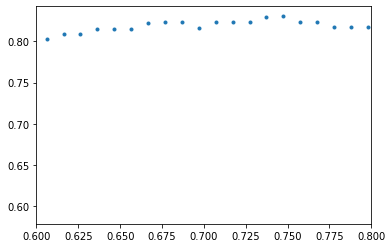

In [109]:
plt.plot(np.array(qd_cv['param_reg_param']), qd_cv['mean_test_score'], '.')
plt.xlim(0.6, 0.8);

## Logistic regression

In [7]:
log_reg(train_df_minmax, train_labels)

([({'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}, 0.9522619047619049),
  ({'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.9522619047619049),
  ({'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}, 0.9455952380952383),
  ({'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}, 0.9455952380952383),
  ({'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, 0.9415476190476191)],
 1.0)

In [36]:
log_cv = log_reg(train_df_minmax, train_labels, params = {
    'solver':['liblinear'], 
    'C':np.append([0.0001, 0.001, 0.01, 0.1], np.arange(1, 100)), 
    'penalty':['l2']
}, cvres = True)

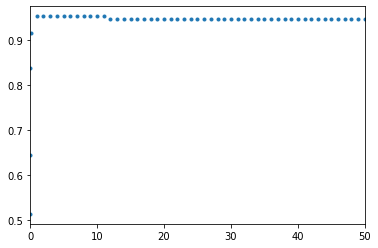

In [37]:
plt.plot(np.array(log_cv['param_C']), log_cv['mean_test_score'], '.')
plt.xlim(0, 50);

## RandomForest

see `cluster_scripts/Sex/rf_sex.py`

Seeing that Minmax scaling worked better with this particular task, I only used it for scaling

## Boosting (Gradient, ADA, XGB)

see `cluster_scripts/Sex/boost_sex.py`

## KNN

In [5]:
knn(train_df_minmax, train_labels)

([({'algorithm': 'auto',
    'n_jobs': -3,
    'n_neighbors': 5,
    'weights': 'distance'},
   0.8488690476190476),
  ({'algorithm': 'auto', 'n_jobs': -3, 'n_neighbors': 5, 'weights': 'uniform'},
   0.8488690476190476),
  ({'algorithm': 'auto',
    'n_jobs': -3,
    'n_neighbors': 20,
    'weights': 'uniform'},
   0.8242261904761905),
  ({'algorithm': 'auto',
    'n_jobs': -3,
    'n_neighbors': 15,
    'weights': 'distance'},
   0.823392857142857),
  ({'algorithm': 'auto',
    'n_jobs': -3,
    'n_neighbors': 15,
    'weights': 'uniform'},
   0.823392857142857)],
 0.8947368421052632)

In [7]:
knn(train_df_minmax, train_labels, params = {
    'n_neighbors':np.arange(1, 20), 
    'algorithm':['auto', 'brute'],
    'weights':['uniform', 'distance'],
    'n_jobs':[-3]
})

([({'algorithm': 'brute',
    'n_jobs': -3,
    'n_neighbors': 6,
    'weights': 'distance'},
   0.8488690476190476),
  ({'algorithm': 'brute',
    'n_jobs': -3,
    'n_neighbors': 6,
    'weights': 'uniform'},
   0.8488690476190476),
  ({'algorithm': 'brute',
    'n_jobs': -3,
    'n_neighbors': 5,
    'weights': 'distance'},
   0.8488690476190476),
  ({'algorithm': 'brute',
    'n_jobs': -3,
    'n_neighbors': 5,
    'weights': 'uniform'},
   0.8488690476190476),
  ({'algorithm': 'auto',
    'n_jobs': -3,
    'n_neighbors': 6,
    'weights': 'distance'},
   0.8488690476190476)],
 0.8947368421052632)

## PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
train_pcs = pca.fit_transform(train_df_stand)

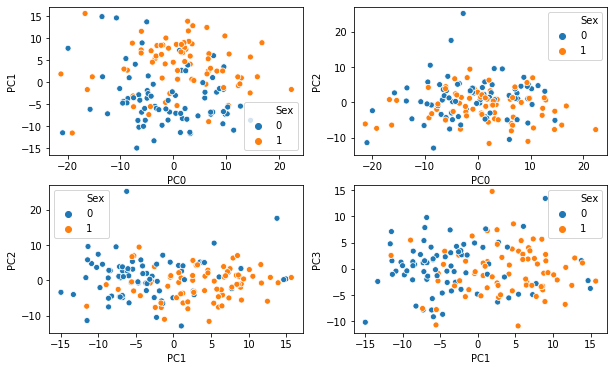

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))

for i in range(2):
    for j in range(i+1, i+3):
        sns.scatterplot(train_pcs[:,i], train_pcs[:, j], hue = train_labels-1, ax = ax[i, j-i-1])
        ax[i, j-i-1].set_xlabel(xlabel = f'PC{i}')
        ax[i, j-i-1].set_ylabel(ylabel = f'PC{j}')

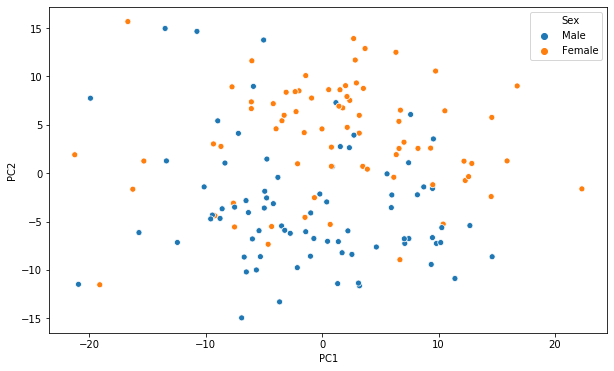

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.scatterplot(train_pcs[:,0], train_pcs[:, 1], hue = train_labels-1)
ax.set_xlabel(xlabel = f'PC{1}')
ax.set_ylabel(ylabel = f'PC{2}')
L=plt.legend()
L.get_texts()[1].set_text('Male')
L.get_texts()[2].set_text('Female')
plt.savefig('../plots/Sex_prediction/two_pcs.png', dpi = 150)

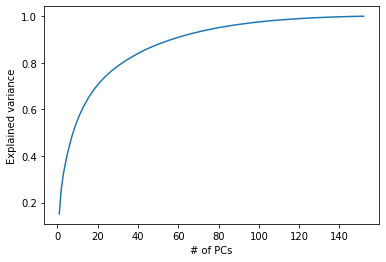

In [134]:
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of PCs')
plt.ylabel('Explained variance');

### PCA-LDA

In [86]:
pca_r2 = []
for i in np.arange(1, 200, 5):
    pca_r2.append([i, da(train_pcs[:, :i], train_labels)[0][0][1]])

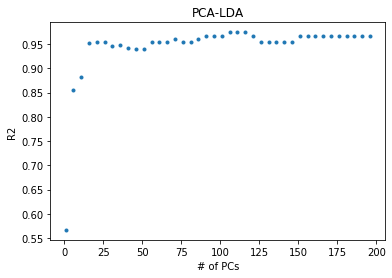

In [87]:
plt.plot(np.array(pca_r2)[:, 0], np.array(pca_r2)[:, 1], '.')
plt.title('PCA-LDA')
plt.xlabel('# of PCs')
plt.ylabel('R2');

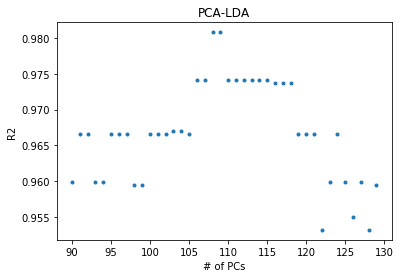

In [15]:
pca_r2 = []
for i in np.arange(90, 130):
    pca_r2.append([i, da(train_pcs[:, :i], train_labels)[0][0][1]])
plt.plot(np.array(pca_r2)[:, 0], np.array(pca_r2)[:, 1], '.')
plt.title('PCA-LDA')
plt.xlabel('# of PCs')
plt.ylabel('R2');

In [17]:
da(train_pcs[:, :112], train_labels)

([({'shrinkage': 0.1131578947368421, 'solver': 'eigen'}, 0.9741666666666667),
  ({'shrinkage': 0.1131578947368421, 'solver': 'lsqr'}, 0.9741666666666667),
  ({'shrinkage': 0.16473684210526315, 'solver': 'eigen'}, 0.9602976190476191),
  ({'shrinkage': 0.16473684210526315, 'solver': 'lsqr'}, 0.9602976190476191),
  ({'shrinkage': 0.06157894736842105, 'solver': 'eigen'}, 0.9549404761904763)],
 1.0)

### PCA-QDA

In [8]:
pca_r2 = []
for i in np.arange(10, 150, 5):
    pca_r2.append([i, da(train_pcs[:, :i], train_labels, which = 'qda')[0][0][1]])

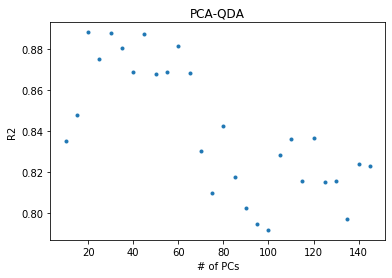

In [40]:
plt.plot(np.array(pca_r2)[:, 0], np.array(pca_r2)[:, 1], '.')
plt.title('PCA-QDA')
plt.xlabel('# of PCs')
plt.ylabel('R2');

In [41]:
da(train_pcs[:, :30], train_labels, which = 'qda')

([({'reg_param': 0.75}, 0.8876190476190476),
  ({'reg_param': 0.5}, 0.887202380952381),
  ({'reg_param': 0.625}, 0.880952380952381),
  ({'reg_param': 0.875}, 0.8733333333333334),
  ({'reg_param': 0.375}, 0.8672023809523809)],
 1.0)